In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ada berapa sport dan apa saja ?

In [10]:
sport_df = pd.read_csv('recommendation/sport_count.csv', header=None)
sport_df.head()

,0,1
0,aerobics,7
1,badminton,10
2,basketball,8
3,bike,71915
4,bike (transport),7757


In [12]:
sport_df[0].unique()

array(['aerobics', 'badminton', 'basketball', 'bike', 'bike (transport)',
       'circuit training', 'climbing', 'core stability training',
       'cross-country skiing', 'downhill skiing', 'elliptical',
       'fitness walking', 'golf', 'gymnastics', 'hiking',
       'horseback riding', 'indoor cycling', 'kayaking', 'kite surfing',
       'martial arts', 'mountain bike', 'orienteering', 'pilates',
       'roller skiing', 'rowing', 'rugby', 'run', 'sailing', 'skate',
       'snowboarding', 'snowshoeing', 'soccer', 'squash', 'stair climing',
       'swimming', 'table tennis', 'tennis', 'treadmill running',
       'treadmill walking', 'walk', 'weight training', 'windsurfing',
       'yoga'], dtype=object)

In [13]:
sport_df[0].nunique()

43

In [18]:
sport_df = sport_df.sort_values(1)
sport_df.head()

,0,1
42,yoga,1
38,treadmill walking,1
32,squash,1
27,sailing,1
41,windsurfing,1


Text(0.5, 1.0, 'Dari total 43 sport. Record Bike & Run paling banyak')

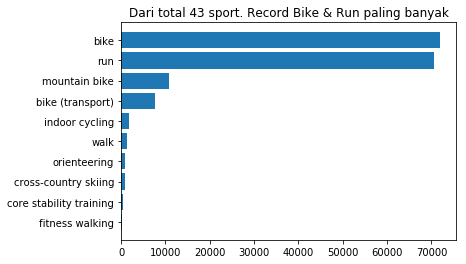

In [26]:
plt.barh(sport_df[0][-10:], sport_df[1][-10:])
plt.title('Dari total 43 sport. Record Bike & Run paling banyak')

# Distribusi gender

In [27]:
df = pd.read_json('Dataset/clean_feature.json', lines=True)
df.head()

,gender,heart_rate,id,lat,lon,speed,sport,userId
0,female,0.0,490077540,23.401958,120.174270,0.0,bike,1040960
1,female,0.0,423547356,23.254675,120.209114,0.0,bike,1040960
2,female,0.0,460371302,23.246359,120.341980,0.0,bike,1040960
3,female,0.0,423547900,23.219341,120.352325,0.0,bike,1040960
4,female,0.0,432926410,23.667118,120.362260,0.0,bike,1040960


In [28]:
df = df.loc[df.gender != 'unknown']

In [29]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [30]:
df.shape

(166598, 8)

In [31]:
male, female = df['gender'].value_counts()
male, female

(156717, 9881)

Text(0.5, 1.0, 'Distribusi gender')

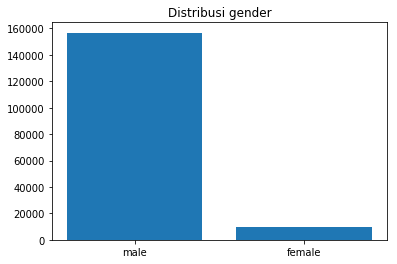

In [32]:
plt.bar(('male', 'female'),(male, female))
plt.title('Distribusi gender')

In [3]:
df = pd.read_csv('Dataset/gender_count.csv', header=None)
df

,0,1
0,female,9881
1,male,156717
2,unknown,1185


Text(0.5, 1.0, 'Distribusi gender')

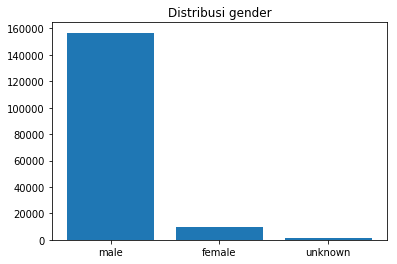

In [6]:
df = df.sort_values(1, ascending=False)
plt.bar(df[0],df[1])
plt.title('Distribusi gender')

In [35]:
df = pd.read_json('Dataset/endomondo.json', lines=True)

In [36]:
df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,sport,userId
0,-0.002000,2469.6900,male,165.336,205454648,29.094667,-81.353615,0.000000,run,478585
1,-0.003599,1946.8801,male,136.688,444762628,13.688887,100.756050,29.722687,bike,11555239
2,-0.004800,966.8748,male,162.262,471800528,55.596527,12.356528,11.776106,run,762872
3,-0.006400,1053.2084,male,155.538,571582823,57.019640,9.918752,14.061889,run,745030
4,-0.006800,1052.5713,male,135.894,499773014,56.376488,9.304066,31.494408,bike,65547


In [39]:
run_df = df.loc[df.sport == 'run']
X = df.loc[df.sport == 'run', ['longitude', 'latitude']]
model = KMeans(n_clusters=4, random_state=88).fit(X)
predictions = model.predict(X)
run_df['cluster'] = predictions

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
run_df.head()

,altitude,distance,gender,heart_rate,id,latitude,longitude,speed,sport,userId,cluster
0,-0.0020,2469.6900,male,165.336,205454648,29.094667,-81.353615,0.000000,run,478585,3
2,-0.0048,966.8748,male,162.262,471800528,55.596527,12.356528,11.776106,run,762872,0
3,-0.0064,1053.2084,male,155.538,571582823,57.019640,9.918752,14.061889,run,745030,0
6,-0.0096,1007.3579,male,139.600,235870865,55.414467,10.364039,0.000000,run,16786,0
7,-0.0100,1053.6771,male,175.010,590075340,57.036550,9.914627,16.752308,run,3297710,0


In [13]:
model.cluster_centers_

array([[ 10.69665088,  51.92972701],
       [112.1115695 ,  14.72351889],
       [-89.37194383,  37.50810277],
       [ -7.82805834, -25.51722023]])

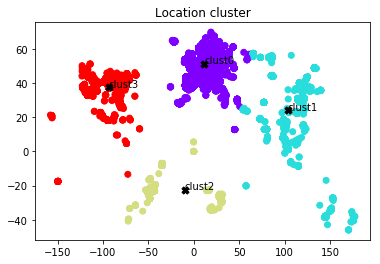

In [73]:
plt.scatter(run_df.longitude, run_df.latitude, c=predictions, cmap='rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='X', s=50, c='black')
plt.title('Location cluster')
for clust_numb, center in enumerate(model.cluster_centers_):
    plt.text(center[0], center[1], 'clust' + str(clust_numb))
plt.show()

In [42]:
cluster_count = run_df.cluster.value_counts()
cluster_count

0    58841
3     5100
1     4351
2     2299
Name: cluster, dtype: int64

In [54]:
cluster_count = cluster_count.sort_values(0, ascending=False).reset_index()
cluster_count

KeyError: 0

In [58]:
cluster_count

,index,cluster
0,0,58841
1,3,5100
2,1,4351
3,2,2299


In [56]:
cluster_count['index']

0    0
1    3
2    1
3    2
Name: index, dtype: int64

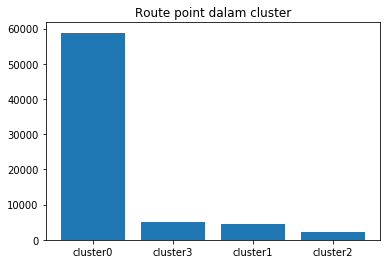

In [68]:
plt.bar(['cluster0', 'cluster3', 'cluster1', 'cluster2'], cluster_count.cluster)
# plt.xticks(['cluster0', 'cluster', 'cluster', 'cluster'])
plt.title('Route point dalam cluster')
plt.show()

In [33]:
df.sport.unique()

array(['run', 'bike', 'rowing', 'treadmill running', 'orienteering',
       'mountain bike', 'bike (transport)', 'indoor cycling',
       'cross-country skiing', 'kayaking', 'circuit training', 'walk',
       'core stability training', 'skate', 'weight training', 'hiking',
       'roller skiing', 'swimming', 'fitness walking', 'pilates',
       'sailing', 'gymnastics', 'aerobics', 'yoga', 'tennis',
       'downhill skiing', 'snowboarding', 'badminton', 'soccer', 'rugby',
       'snowshoeing', 'golf', 'climbing', 'elliptical', 'windsurfing',
       'martial arts', 'stair climing', 'horseback riding', 'squash',
       'basketball', 'table tennis', 'treadmill walking', 'kite surfing'],
      dtype=object)